### import data

In [14]:
path = "./newdata.csv"
NAMES <- read.table(path, nrow = 1, stringsAsFactors = FALSE, sep = ",")
DATA <- read.table(path, skip = 1, stringsAsFactors = FALSE, sep = ",")
names(DATA) <- NAMES 
data=DATA[,c('instanceID','wallTime','transactions')]


### sort instanceID by overall comutationTime

In [15]:
sum=aggregate(x=data["wallTime"],
          by=list(instanceID=DATA$instanceID),
          FUN=sum
         )
sorted=sum[order(sum$wallTime,decreasing=T),] 
sortedInstanceID=sorted$instanceID
sortedInstanceID
sorted

[1] "i-075927050a1a8a230" "i-07c7612d4724d24f0" "i-0b44fa417abbf60e9"
 [4] "i-0567b6b216d82a1e9" "i-04e4af4c00488f193" "i-09f2cbcb7dfd99003"
 [7] "i-0c9520177594c4838" "i-02095124b852e65e8" "i-0af4bbaf8db090b72"
[10] "i-0a84d17f3decceb44" "i-079ef574754058337" "i-0f4032aaef24dd285"
[13] "i-09f6a2385566d793d" "i-028c23d9bc98111dc" "i-003df3ac073d27e0d"
[16] "i-0351f7b4f68690e78"

,instanceID,wallTime
7,i-075927050a1a8a230,2892.7685
9,i-07c7612d4724d24f0,2712.4896
14,i-0b44fa417abbf60e9,2531.3332
6,i-0567b6b216d82a1e9,2350.1633
5,i-04e4af4c00488f193,2168.3795
10,i-09f2cbcb7dfd99003,1989.5153
15,i-0c9520177594c4838,1806.7654
2,i-02095124b852e65e8,1625.8014
13,i-0af4bbaf8db090b72,1444.6491
12,i-0a84d17f3decceb44,1264.5335


In [16]:
runs=3

labeled=data[0:0,]
InstanceId=sortedInstanceID
n=length(InstanceId)
for(i in InstanceId){
    forthisInstance=data[data$instanceID==i,]
    offset=which(InstanceId==i)-1
    
    len=dim(forthisInstance)[1]/runs

    for(j in 1:len){
        x=(j-1)*runs+1
        y=(j*runs)
        
        tmp=data.frame(forthisInstance[x:y,],'set'=j+offset,'vmID'=len)
        
        labeled<-rbind(labeled,tmp) 
        
    }
}



In [17]:
labeled

,instanceID,wallTime,transactions,set,vmID
163,i-075927050a1a8a230,60.39744,52355,1,16
164,i-075927050a1a8a230,60.23533,62181,1,16
165,i-075927050a1a8a230,60.21718,62119,1,16
166,i-075927050a1a8a230,60.21917,64128,2,16
167,i-075927050a1a8a230,60.21923,64387,2,16
168,i-075927050a1a8a230,60.21144,64099,2,16
169,i-075927050a1a8a230,60.26616,64484,3,16
170,i-075927050a1a8a230,60.21470,64496,3,16
171,i-075927050a1a8a230,60.24671,46728,3,16
172,i-075927050a1a8a230,60.22809,66545,4,16


# output labeled data

In [27]:
write.csv(labeled[1:5],"./labeled.csv")

# pgbench, c4.large*16*3runs, EBS_100G_5000IOPS

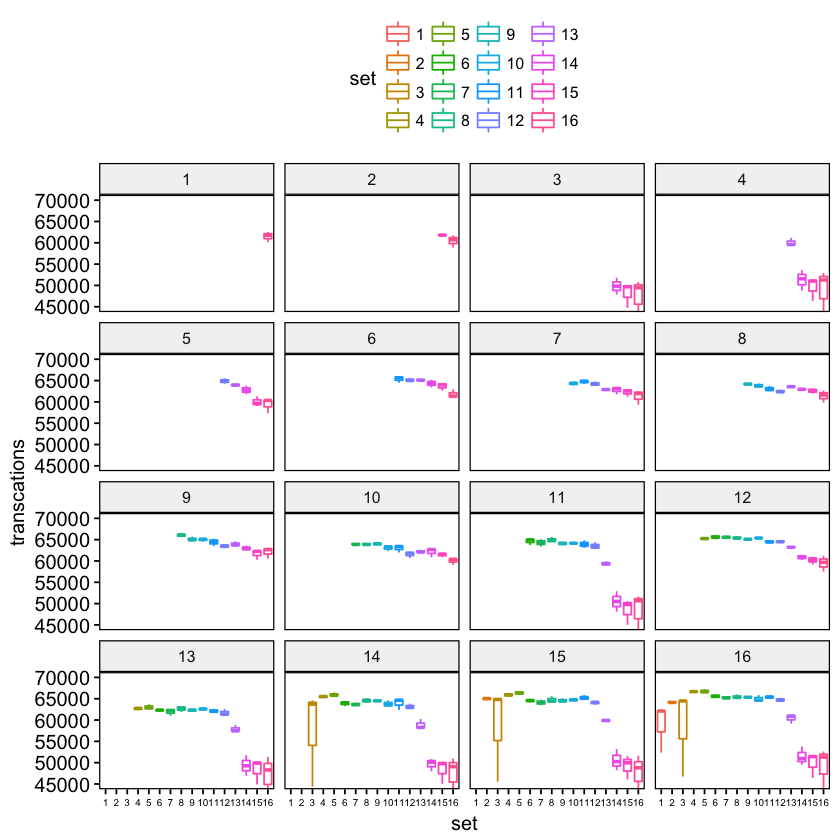

In [25]:
library("ggpubr")
ggboxplot(labeled, x = "set", y = "transactions", 
          color = "set", 
          ylab = "transcations", xlab = "set",facet.by='vmID',font.xtickslab = 6,ylim = c(45000,70000))



In [20]:
statistic_aggregate=data.frame()

for(i in 1:16){
    thisSet=labeled[labeled$set==i,'transactions']
    statistic_aggregate=rbind(statistic_aggregate,c(range(thisSet),mean(thisSet),median(thisSet),var(thisSet),i))
}
names(statistic_aggregate)<-c('min','max','mean','median','var','set')
statistic_aggregate

min,max,mean,median,var,set
52355,62181,58885.00,62119.0,31981636.0,1
64099,65208,64594.00,64547.0,217855.2,2
44385,65062,58204.89,64484.0,90510142.6,3
62308,66706,65173.67,65685.5,2620688.2,4
62533,67274,65483.47,65791.0,2013845.7,5
62071,66137,64422.89,64682.5,1543281.9,6
61014,65826,64129.38,64101.0,1472176.4,7
61891,66307,64725.62,64912.0,1195725.1,8
61934,65710,64373.56,64460.0,840988.1,9
62277,65903,64161.70,64338.0,914328.7,10
